In [73]:
import pandas as pd
import numpy as np


In [74]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [75]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns=['id'])

# Apply Label Encoding
label_encoder = LabelEncoder()
columns = ['gender','ever_married','work_type','Residence_type','smoking_status']

for i in range(len(columns)):
  df[columns[i]] = label_encoder.fit_transform(df[columns[i]])

df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [76]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

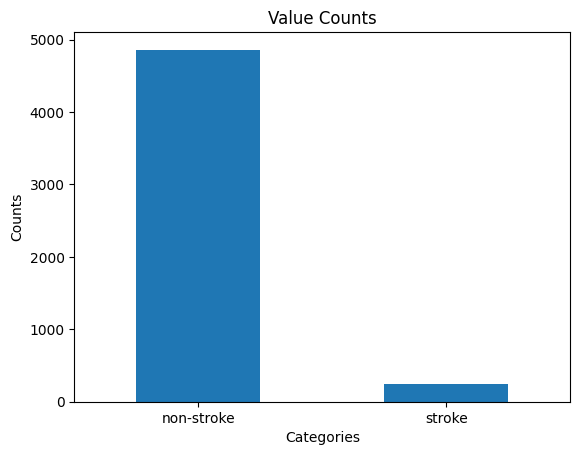

stroke
1    4861
0    4861
Name: count, dtype: int64

In [77]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# Assuming df contains your dataset

# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

y.value_counts().rename({0: 'non-stroke', 1: 'stroke'}).plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.DataFrame(X_resampled, columns=X.columns)
df['stroke'] = y_resampled

y_resampled.value_counts()


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

X_sampled = df.drop('stroke', axis=1)
y_sampled = df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 1.44145554  0.98980393 -0.30206686 ... -0.24065533 -0.0896789
  -1.31320919]
 [-0.69281446 -0.00701271  3.31052537 ...  1.6461563   1.63040898
   1.7871916 ]
 [-0.69281446  0.30826594 -0.30206686 ... -0.94463251 -0.76229306
   0.75372467]
 ...
 [-0.69281446  1.17154739 -0.30206686 ... -0.71710168 -1.13105672
  -0.27974226]
 [-0.69281446 -0.41870792 -0.30206686 ... -0.3469024   3.1877432
   1.7871916 ]
 [ 1.44145554  1.12689029 -0.30206686 ...  1.01420148  0.30286183
  -0.27974226]]


In [42]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



classifiers = {
    "LinearSVC": LinearSVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3),
    "RandomForest": RandomForestClassifier(random_state=42,n_estimators=100,max_depth=10),
    "KNN": KNeighborsClassifier()
}

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy=[]
precision=[]
recall=[]


for name, model in classifiers.items():

    model.fit(X_train_scaled, y_train)

    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)


    print(f"\n{name} Metrics:")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    print("Confusion Matrix for Decision Tree:")
    print(confusion_matrix(y_test, test_predictions))

    print("Classification Report:")
    print(classification_report(y_test, test_predictions))

    precision_value = precision_score(y_test, test_predictions)

    recall_value = recall_score(y_test, test_predictions)

    accuracy.append([name,test_accuracy])
    precision.append([name,precision_value])
    recall.append([name,recall_value])



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



LinearSVC Metrics:
Train Accuracy: 0.8116091109478325
Test Accuracy: 0.8117929379499486
Confusion Matrix for Decision Tree:
[[1138  319]
 [ 230 1230]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1457
           1       0.79      0.84      0.82      1460

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917


DecisionTree Metrics:
Train Accuracy: 0.8321822189566496
Test Accuracy: 0.8073363044223517
Confusion Matrix for Decision Tree:
[[1045  412]
 [ 150 1310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1457
           1       0.76      0.90      0.82      1460

    accuracy                           0.81      2917
   macro avg       0.82      0.81      0.81      2917
weighted avg       0.82      0.81      0.81     

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

base_classifiers = [
    ("LinearSVC", CalibratedClassifierCV(LinearSVC(random_state=42))),
    ("DecisionTree", DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3)),
    ("RandomForest", RandomForestClassifier(random_state=42,n_estimators=100,max_depth=10)),
    ('knn', KNeighborsClassifier())
]

# Define the stacking classifier with Logistic Regression as the meta-classifier
stack_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(random_state=42),
    stack_method = 'predict_proba',
    cv=5  # Cross-validation strategy for training base classifiers
)

# Train the stacking classifier
stack_clf.fit(X_train_scaled, y_train)

# Predict and evaluate the stacking classifier
final_predictions = stack_clf.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train,stack_clf.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, final_predictions)
print("Training Accuracy of stacking classifier:", train_accuracy)
print("Test Accuracy of stacking classifier:", test_accuracy)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Training Accuracy of stacking classifier: 0.9657604702424688
Test Accuracy of stacking classifier: 0.9266369557764826
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1457
           1       0.91      0.95      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [44]:
precision_value = precision_score(y_test, final_predictions)

# Calculate recall
recall_value = recall_score(y_test, final_predictions)

accuracy.append(["Stacked",test_accuracy])
precision.append(["Stacked",precision_value])
recall.append(["Stacked",recall_value])


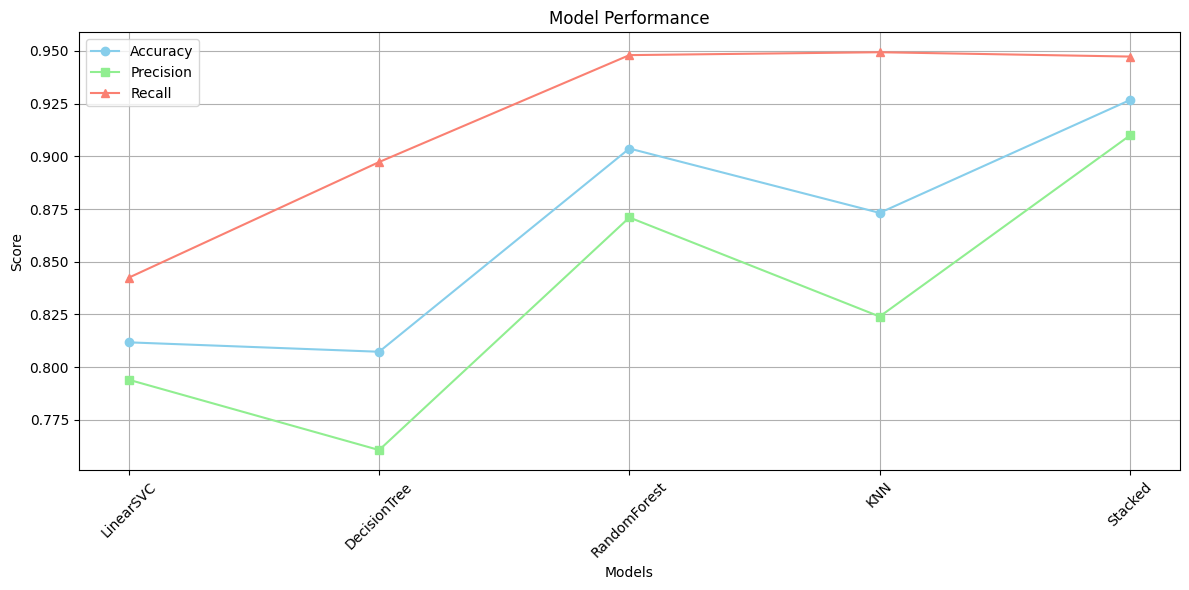

In [45]:
accuracy_scores = [entry[1] for entry in accuracy]  # Extracting model names and removing them from sets
model_names = [entry[0] for entry in accuracy]  # Extracting scores and removing them from sets

precision_scores = [entry[1] for entry in precision]  # Extracting scores and removing them from sets

recall_scores = [entry[1] for entry in recall]  # Extracting scores and removing them from sets

accuracy_scores


plt.figure(figsize=(12, 6))

plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', label='Accuracy')
plt.plot(model_names, precision_scores, marker='s', color='lightgreen', label='Precision')
plt.plot(model_names, recall_scores, marker='^', color='salmon', label='Recall')

plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

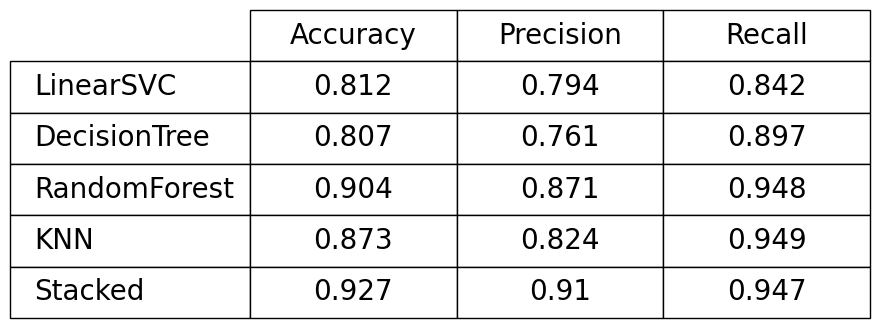

In [46]:
accuracy_scores = [round(score, 3) for score in accuracy_scores]
precision_scores = [round(score, 3) for score in precision_scores]
recall_scores = [round(score, 3) for score in recall_scores]
data = {
    'Model Name': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df = pd.DataFrame(data)
df.set_index('Model Name', inplace=True)

# Create table plot
plt.figure(figsize=(8, 4))
table = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center',bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(1.2, 1.2)

# Hide axis
plt.axis('off')

# Save table as image
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.05)
